In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mlt
import numpy as np

In [195]:
df = pd.read_csv('Melbourne_housing.csv')

In [196]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [198]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

## 1.Data Exploration and Visualization
- Explore the Melbourne house dataset.

- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.

- Include any other plots you find interesting and provide brief interpretations.

<Axes: xlabel='Price', ylabel='Count'>

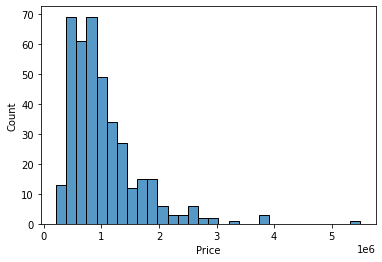

In [199]:
sns.histplot(df['Price'], bins=30)

 Most houses are priced near 1 million dollars, while the plot is right skewed, meaning some houses are way more expensive than the average.

In [83]:
numeric_features = ['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Propertycount']

In [84]:
# Drop rows where any of the numeric features have a missing value
df_numeric = df.dropna(subset=numeric_features)

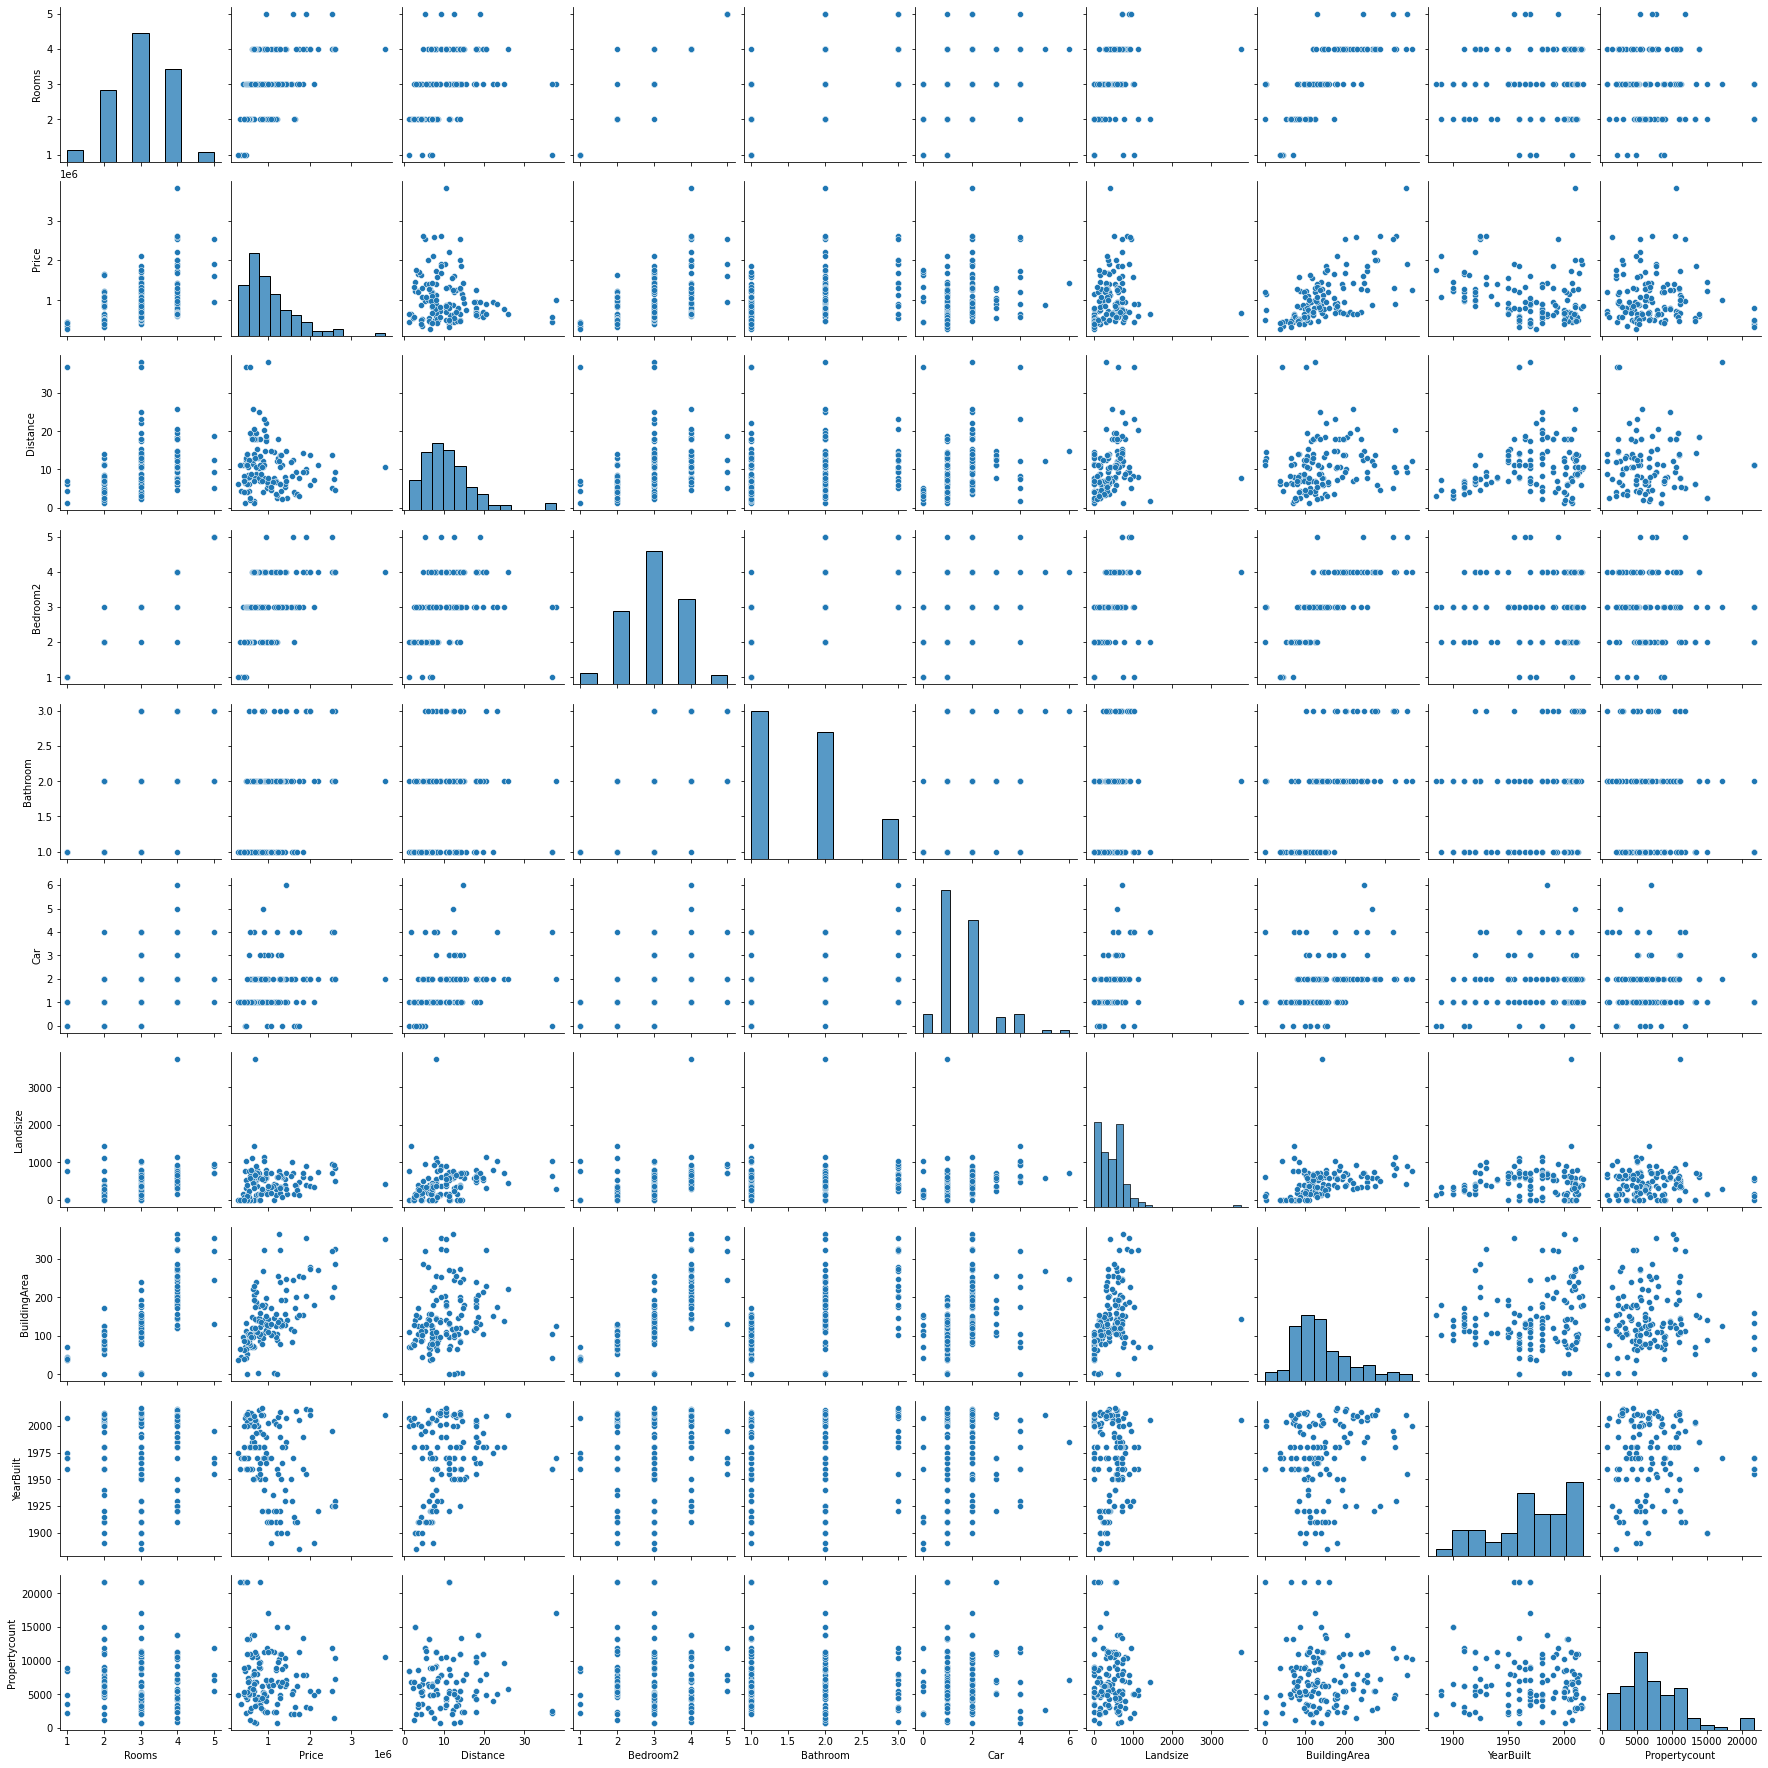

In [85]:
sns.pairplot(df_numeric[numeric_features])

The piarplot is too overwhelming, but we can broadly see what variable are correlated. So, we can further explora more accordingly.

<Axes: xlabel='Distance', ylabel='Price'>

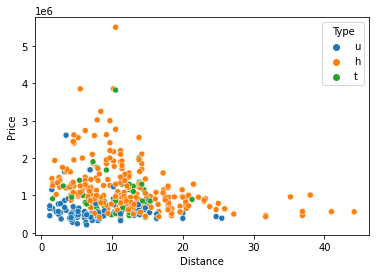

In [86]:
sns.scatterplot(y = 'Price', x = 'Distance', hue = 'Type', data = df)

The scatter plot shows that high price houses are mainly concentrated near CBD. and those house that are far from CBD are almot all lower priced. And h type - house,cottage,villa, semi,terrace are generally more expensive than other types of houses

<Axes: ylabel='YearBuilt'>

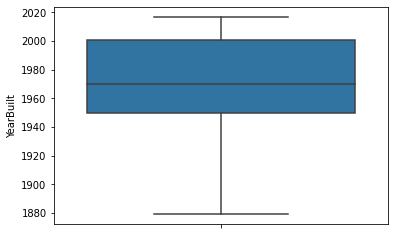

In [87]:
sns.boxplot(y='YearBuilt', data=df)

The box plot shows the median YearBuilt of houese is around 1970, but the bottom tail is very long, showing there are some old houses that are back to 1880 exist. And the median line is closer to the top, meaning there are more houses built after 1970.

<Axes: xlabel='YearBuilt', ylabel='Count'>

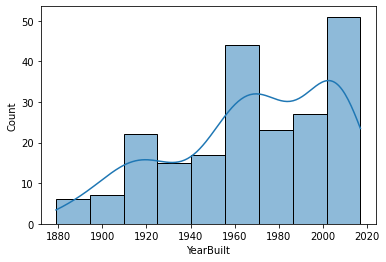

In [88]:
sns.histplot(df['YearBuilt'], edgecolor='black', kde=True)

<Axes: xlabel='Date', ylabel='Price'>

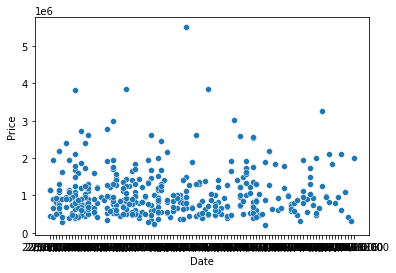

In [219]:
sns.scatterplot(x = 'Date', y = 'Price', data = df)

The distribution plot shows the same information about YearsBuilt

<Axes: xlabel='YearBuilt', ylabel='Price'>

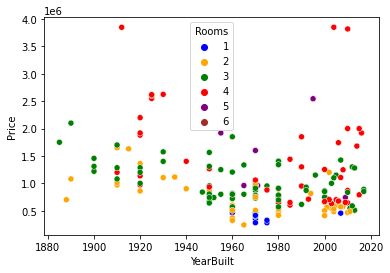

In [89]:
# Define a color for each room count up to 6 using color names
color_palette = {1: "blue", 2: "orange", 3: "green", 4: "red", 5: "purple", 6: "brown"}

# Create the scatter plot using the custom color palette
sns.scatterplot(x='YearBuilt', y='Price', hue='Rooms', palette=color_palette, data=df)

Spots are more crowded on the right, showing more houese built around 2000, and expensive houeses usually have more rooms.

## **2. Linear Regression Model Development** :
- Develop a Linear regression model to predict price of house in Melbourne.

- Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.).

- Explain the steps you took in preparing the data and developing the model.

- You might need to encode the values for your prediction.

In [200]:
# See how much Nan each variable has
missing_values_count = df.isna().sum()
print(missing_values_count)

Suburb             0
Address            0
Rooms              0
Type               0
Price            108
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2         128
Bathroom         128
Car              137
Landsize         174
BuildingArea     310
YearBuilt        287
CouncilArea        0
Lattitude        122
Longtitude       122
Regionname         0
Propertycount      0
dtype: int64


In [201]:
# Price is what we going to predict, so we should drop those rows that don't have price
df = df.dropna(subset=['Price'])

In [202]:
#Use mean to fill in the NA values here
df['Landsize'] = df['Landsize'].fillna(value=df['Landsize'].mean())

In [203]:
#Use mean to fill in the NA values here
df['Bedroom2'] = df['Bedroom2'].fillna(value=df['Bedroom2'].mean())

In [204]:
#Use mean to fill in the NA values here
df['Bathroom'] = df['Bathroom'].fillna(value=df['Bathroom'].mean())

In [205]:
#Use mean to fill in the NA values here
df['BuildingArea'] = df['BuildingArea'].fillna(value=df['BuildingArea'].mean())

In [206]:
# Use 0 car spot as defult to fill those na values
df['Car'] = df['Car'].fillna(value = 0)

In [207]:
# Since I already know the YearBuilt is skewed, I used median here to fill in the NA values
df['YearBuilt'] = df['YearBuilt'].fillna(value = df['YearBuilt'].median())

In [208]:
# calculate the missing values again, ensure no NA values for needed features
missing_values_count = df.isna().sum()
print(missing_values_count)

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Method            0
SellerG           0
Date              0
Distance          0
Postcode          0
Bedroom2          0
Bathroom          0
Car               0
Landsize          0
BuildingArea      0
YearBuilt         0
CouncilArea       0
Lattitude        88
Longtitude       88
Regionname        0
Propertycount     0
dtype: int64


In [209]:
df['SellerG'].value_counts()

SellerG
Jellis           43
Nelson           38
Barry            28
Ray              23
hockingstuart    23
                 ..
Jason             1
@Realty           1
VICPROP           1
iTRAK             1
Hall              1
Name: count, Length: 85, dtype: int64

In [220]:
# Drop features I don't need
df_cleaned = df.drop(['Method','Postcode','CouncilArea','Lattitude','Longtitude','Address','Suburb','SellerG','Date'], axis = 1)

In [221]:
df_cleaned.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,2,u,438000.0,6.5,2.000000,1.000000,1.0,0.000000,66.000000,1970.0,Northern Metropolitan,8870
1,2,h,901000.0,7.8,2.000000,1.000000,1.0,545.000000,107.000000,1940.0,Northern Metropolitan,11204
2,3,u,800000.0,13.9,3.000000,2.000000,2.0,261.000000,144.172785,1970.0,Southern Metropolitan,10969
3,3,t,1155000.0,12.4,3.006689,1.598662,0.0,525.146067,144.172785,1970.0,Eastern Metropolitan,5420
4,3,u,1630000.0,3.3,3.000000,1.000000,1.0,0.000000,144.172785,1970.0,Southern Metropolitan,14887


In [222]:
#Encode Regionname
region_dummies = pd.get_dummies(df_cleaned['Regionname']).astype(int)

In [223]:
#Combine the encoded variable with dataframe and drop the original Regionname
df_encoded = pd.concat([df_cleaned, region_dummies], axis=1)
df_encoded.drop('Regionname', axis=1, inplace=True)

In [224]:
df_encoded.head()

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,u,438000.0,6.5,2.000000,1.000000,1.0,0.000000,66.000000,1970.0,8870,0,0,1,0,0,0,0,0
1,2,h,901000.0,7.8,2.000000,1.000000,1.0,545.000000,107.000000,1940.0,11204,0,0,1,0,0,0,0,0
2,3,u,800000.0,13.9,3.000000,2.000000,2.0,261.000000,144.172785,1970.0,10969,0,0,0,0,0,1,0,0
3,3,t,1155000.0,12.4,3.006689,1.598662,0.0,525.146067,144.172785,1970.0,5420,1,0,0,0,0,0,0,0
4,3,u,1630000.0,3.3,3.000000,1.000000,1.0,0.000000,144.172785,1970.0,14887,0,0,0,0,0,1,0,0


In [225]:
# Encode Type
type_dummies = pd.get_dummies(df_cleaned['Type']).astype(int)

In [226]:
#Combine the encoded variable with dataframe and drop the original type
df_encoded = pd.concat([df_encoded, type_dummies], axis=1)
df_encoded.drop('Type', axis=1, inplace=True)

In [292]:
df_encoded.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u
0,2,438000.0,6.5,2.000000,1.000000,1.0,0.000000,66.000000,1970.0,8870,...,0,1,0,0,0,0,0,0,0,1
1,2,901000.0,7.8,2.000000,1.000000,1.0,545.000000,107.000000,1940.0,11204,...,0,1,0,0,0,0,0,1,0,0
2,3,800000.0,13.9,3.000000,2.000000,2.0,261.000000,144.172785,1970.0,10969,...,0,0,0,0,1,0,0,0,0,1
3,3,1155000.0,12.4,3.006689,1.598662,0.0,525.146067,144.172785,1970.0,5420,...,0,0,0,0,0,0,0,0,1,0
4,3,1630000.0,3.3,3.000000,1.000000,1.0,0.000000,144.172785,1970.0,14887,...,0,0,0,0,1,0,0,0,0,1


In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV

from sklearn.preprocessing import LabelEncoder

In [230]:
# Assign X and y
X = df_encoded.drop('Price',axis = 1)
y = df_encoded['Price']

In [298]:
# Split dataset into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [299]:
model = LinearRegression().fit(X_train, y_train)

In [300]:
# Predict y using X test
y_pred = model.predict(X_test)

## 3. **Model Evaluation** :
- Evaluate your linear regression model using appropriate metrics.

- Split the dataset into training and testing sets to perform this evaluation.

- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [301]:
# Calculate OOS R^2, MSE, and RMSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2:", round(r2,4))
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

R^2: 0.4994
MSE: 365132096676.96
RMSE: 604261.61


R² of 0.4994 means that approximately 49.94% of the variation in the dependent variable can be explained by the independent variables.
A lower MSE is better as it indicates a closer fit to the data. However, since MSE is scale-dependent, it can be hard to interpret on its own without context.
RMSE is the square root of the MSE. It's a measure of the average magnitude of the errors in a set of predictions, without considering their direction. It's in the same units as the target variable, making it more interpretable than MSE.The RMSE value of 604261.61 indicates the typical error in the model's predictions. 

The Model is performing Fine with a decent R^2 and RMSE

## 4. **Regularization**:
- Is there a need for Lasso regularization? Explain. (Compare test and training results)

- Set up a Lasso regression model with specified parameters and fit it to the training data.

- Perform Lasso regression on both training and test data

- Analyze and explain how the results change from previous answer.

In [302]:
# Compare the test and training results with R2 score
r2_train = model.score(X_train, y_train)
r2_test = r2_score (y_test, y_pred)

print("R^2 in train set:", round(r2_train,2))
print("R^2 in test set:", round(r2_test,2))

R^2 in train set: 0.67
R^2 in test set: 0.5


the R-squared (R²) value for the test set (0.5) is lower than for the training set (0.67). This means the model fits the training data better than the test data. Applying Lesso seems a reasonable action to take.

In [250]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [303]:
# Scale all of the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [314]:
# Define a range of alpha values to test
alphas = np.logspace(-4, 10, 300)

# Initialize and fit the LassoCV regressor, and LassoCV does cross validation and find the optimal alpha value
lasso_cv = LassoCV(alphas=alphas, cv=10, random_state=128)
lasso_cv.fit(X_train_scaled, y_train)

# The best alpha value found
print("Best alpha value:", lasso_cv.alpha_)


Best alpha value: 7348.872892180373


In [315]:
print("Lasso coefficients:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)

Lasso coefficients: [ 121096.80255133 -234419.81262986      -0.          111804.87844708
   56001.54572041   19015.58003259   91219.06935345  -97346.0675373
       0.               0.           37349.52015619  -95896.70331524
   10285.85058558   26859.96385003   99704.49173938 -104415.48002515
      -0.           67458.82456255      -0.          -98388.71605514]
Intercept: 1004231.2499999997


In [316]:
# Precict y using the lasso model
y_train_pred_lasso = lasso_cv.predict(X_train_scaled)
y_test_pred_lasso = lasso_cv.predict(X_test_scaled)

In [317]:
r2_lasso = r2_score(y_train, y_train_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))

oos_r2_lasso = r2_score(y_test, y_test_pred_lasso)
oos_rmse_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Training R²:", r2_lasso)
print("Training RMSE:", rmse_lasso)

print("Test R² OOS R^2", oos_r2_lasso)
print("Test R² OOS RMSE:", oos_rmse_lasso)

Training R²: 0.6602682821834239
Training RMSE: 326224.112611614
Test R² OOS R^2 0.4870614138779077
Test R² OOS RMSE: 611634.7244380505


Training score: 0.660268 suggests that the model explains approximately 66.03% of the variance in the target variable based on the training data.
Test score: 0.48706, it indicates that the model explains about 48.71% of the variance in the target variable in the test dataset.

The model is not good enough to predict the unseen data.

Overall, the lasso regression didn't change R^2 and RMSE, indicating no improvement

## 5. Out-of-sample performance  :
- Ignore all previously trained models.

- Split the data into a new training and test 80-20.

- Newly train (fit) the linear regression model on the training data.

- Newly train (fit) the lasso regression model on the training data.

- Estimate AIC, AICc, BIC, as well as 5-fold CV for both models using only the training data.

- Estimate the models true OOS performance by computing their deviance on the test data.

- Compare all (deviance) values.  Which IC is most similar to the models’ true OOS performance?  How does 5-fold CV compare?  Explain.

In [318]:
# Re-prepare
X2 = df_encoded.drop('Price', axis=1)
y2 = df_encoded['Price']

# Split dataset into train set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=101)

In [319]:
# New linear regression model on the training data
model2 = LinearRegression().fit(X_train2, y_train2)

In [320]:
#New Lasso Regression
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# Find the best alpha parameter for Lasso model
lasso_cv2 = LassoCV(alphas=None, cv=10, random_state=101)
lasso_cv2.fit(X_train_scaled2, y_train) # Fit the model
print(f"Best alpha: {lasso_cv.alpha_}") # Best alpha

Best alpha: 7348.872892180373


In [321]:
# Number of parameters (including the intercept)
n_params = model2.coef_.shape[0] + 1 

# Calculate Residual Sum of Squares (RSS)
rss = mean_squared_error(y_train2, model2.predict(X_train2)) * len(y_train2)

# Number of observations
n = X_train2.shape[0]

# AIC
aic = n * np.log(rss / n) + 2 * n_params

# AICc
aicc = aic + (2 * n_params * (n_params + 1)) / (n - n_params - 1)

# BIC
bic = n * np.log(rss / n) + np.log(n) * n_params

print(f"Linear Regression - AIC: {aic}, AICc: {aicc}, BIC: {bic}")

Linear Regression - AIC: 8084.3525438517745, AICc: 8087.5387507483265, BIC: 8162.955610795773


In [322]:
# Calculate RSS (Residual Sum of Squares) for Lasso Regression
rss_lasso = np.sum((y_train2 - y_train_pred_lasso2) ** 2)
# Number of non-zero coefficients plus intercept
n_params_lasso = np.sum(lasso_cv2.coef_ != 0) + 1

# Number of observations
n = X_train2.shape[0]

# AIC for Lasso
aic_lasso = n * np.log(rss_lasso / n) + 2 * n_params_lasso

# AICc for Lasso (Corrected AIC)
aicc_lasso = aic_lasso + (2 * n_params_lasso * (n_params_lasso + 1)) / (n - n_params_lasso - 1)

# BIC for Lasso (Bayesian Information Criterion)
bic_lasso = n * np.log(rss_lasso / n) + np.log(n) * n_params_lasso

print(f"Lasso Regression - AIC: {aic_lasso}, AICc: {aicc_lasso}, BIC: {bic_lasso}")


Lasso Regression - AIC: 8366.861251562164, AICc: 8366.87415478797, BIC: 8370.604254749975


In [323]:
from sklearn.model_selection import cross_val_score

# Linear Regression 5-fold CV
cv_scores_linear = cross_val_score(LinearRegression(), X_train2, y_train2, cv=5)
print("Linear Regression - 5-Fold CV Scores:", cv_scores_linear)

# Lasso Regression 5-fold CV
cv_scores_lasso = cross_val_score(Lasso(alpha=lasso_cv2.alpha_), X_train_scaled2, y_train2, cv=5)
print("Lasso Regression - 5-Fold CV Scores:", cv_scores_lasso)


Linear Regression - 5-Fold CV Scores: [0.58084212 0.58312535 0.65911888 0.50718812 0.59685716]
Lasso Regression - 5-Fold CV Scores: [0.62558859 0.48482917 0.5997452  0.42183239 0.50158447]


In [324]:
# Predictions for Linear Regression
y_test_pred_linear = model2.predict(X_test2)

# Predictions for Lasso Regression
y_test_pred_lasso = lasso_cv2.predict(X_test_scaled2)
# Calculate RSS for Linear Regression
rss_linear = np.sum((y_test2 - y_test_pred_linear) ** 2)

# Calculate RSS for Lasso Regression
rss_lasso = np.sum((y_test2 - y_test_pred_lasso) ** 2)

print("Linear Regression - RSS on Test Data:", rss_linear)
print("Lasso Regression - RSS on Test Data:", rss_lasso)

Linear Regression - RSS on Test Data: 12723395254076.422
Lasso Regression - RSS on Test Data: 19449099140273.438


In [325]:
# Calculate MSE for Linear Regression
mse_linear = mean_squared_error(y_test2, y_test_pred_linear)

# Calculate MSE for Lasso Regression
mse_lasso = mean_squared_error(y_test2, y_test_pred_lasso)

print("Linear Regression - MSE on Test Data:", mse_linear)
print("Lasso Regression - MSE on Test Data:", mse_lasso)


Linear Regression - MSE on Test Data: 161055636127.54965
Lasso Regression - MSE on Test Data: 246191128357.8916


The Linear Regression model has lower RSS and MSE on the test data, it seems to have performed better OOS compared to the Lasso Regression model. This might suggest that, for specific dataset and problem, the regularization introduced by Lasso did not provide a benefit in terms of OOS performance.

The 5-fold CV scores suggest that the Linear Regression model has a better and more consistent performance compared to the Lasso Regression model, which is in line with the RSS and MSE results on the test data.

Linear Regression model's IC values are lower than those for the Lasso Regression，it would indicate that AIC/AICc might be more reflective of the true OOS performance for these models. 